<a href="https://colab.research.google.com/github/prachi-jangid/Supervised-Machine-Learning-Task-1/blob/main/Prachi_Jangid_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Author: Prachi Jangid**





**Simple Linear Regression**

In this regression task  we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.




In [96]:
# Importing all libraries required in this notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [38]:
df=pd.read_csv("/content/drive/My Drive/Datasets/student_scores.csv")

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
print("rows,columns:",str(df.shape))

rows,columns: (25, 2)


In [42]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [44]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script**

Text(0.5, 1.0, 'Hours vs Percentage')

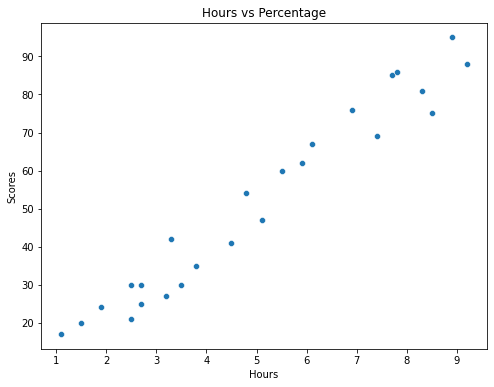

In [45]:
graph=plt.figure(figsize=(8,6))
sb.scatterplot(x='Hours',y="Scores",data=df)
plt.title('Hours vs Percentage')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [46]:
x=df['Hours']
y=df['Scores']

In [47]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=6)


In [48]:
 from sklearn.linear_model import LinearRegression

 Training the Algorithm

 We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [58]:
model=LinearRegression()
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [59]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Plotting the regression line

In [67]:
line = model.coef_*x_train+model.intercept_


Plotting for the test data

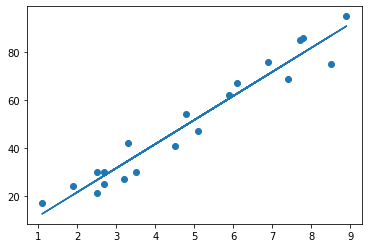

In [70]:
plt.scatter(x_train,y_train)
plt.plot(x_train,line)
plt.show()

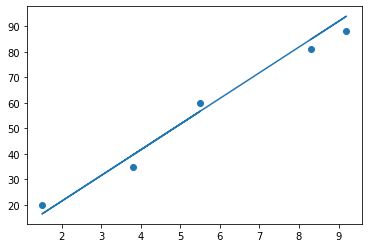

In [73]:
line1 = model.coef_*x_test+model.intercept_
plt.scatter(x_test,y_test)
plt.plot(x_test,line1)
plt.show()

In [85]:
y_pred = model.predict(x_test)
y_pred

array([[39.59421488],
       [56.68453365],
       [16.47201889],
       [93.8811098 ],
       [84.83329398]])

In [90]:
y_test

array([[35],
       [60],
       [20],
       [88],
       [81]])

Comparing Actual vs Predicted

In [95]:
data={'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()} #flatten to convert into 1-D array.
labels=['0','1','2','3','4']
df = pd.DataFrame(data,index=labels)
df 

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


For own data

In [106]:
hour1=np.array([9.5])
own_pred=model.predict(hour1.reshape(-1,1))
print("No of Hours = {}\n".format(hour1))
print("Predicted Score = {}\n".format(own_pred))


No of Hours = [9.5]

Predicted Score = [[96.89704841]]



Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [107]:
from sklearn import metrics
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)


In [108]:
mae

4.2304132231404825

Model Score

In [110]:
model.score(x_train,y_train)#for train data

0.9454367725240986

In [113]:
model.score(x_test,y_test)#fror test data

0.9723939704109645